In [1]:
import sys
sys.path.append('../../Polished_code')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tools import *
import scipy.io
from utils import *

# Data loading
- elevation
- CIR feature
- CIR pure
- CIR with noise (observation, snr=20)
- CFR
- CIR norm
- CFR norm

In [3]:
tx_ele = scipy.io.loadmat('../../Simulation/dataset/data_with_building/ele_tx.mat')['ele_matrix']
rx_ele = scipy.io.loadmat('../../Simulation/dataset/data_with_building/ele_rx.mat')['ele_rx_set']

In [4]:
location = 'london_square_20'
base = f'../../Simulation/dataset/data_with_building/{location}_cell.mat'

meta = scipy.io.loadmat(base)['london_square_20_cell'][0][0]
cir_profile_ld = meta[0]
TX_ld = meta[1].T
RX_ld = meta[2].T
distance_tr = meta[3]
n_tx, n_rx = len(TX_ld), len(RX_ld)
r_tx, r_rx = int(np.sqrt(n_tx)), int(np.sqrt(n_rx))

In [5]:
rssi_dir = f'../../Simulation/dataset/rssi_london.mat'
# rssi_dir = f'../../Simulation/dataset/data_with_building/rssi_london_10000.mat'

rssi_ld = scipy.io.loadmat(rssi_dir)['rssi_london']

rssi_ld = np.nan_to_num(rssi_ld, neginf=1) # replace nan value to 1

In [6]:
cirs_feature = extract_features(cir_profile_ld)

In [7]:
# data preparation for observations

# initiate an extractor
ext_ld = Extractor(cir_profile_ld)
# formatting CIR profiles
X_ld = ext_ld.formatting_X(max_len=20)

../../Polished_code\tools.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mag = - math.floor(math.log(np.mean(self.delay_set), 10))
../../Polished_code\tools.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  cir_t.append(np.array(cir_shaped, dtype='float').flatten())


In [147]:
fc = 2e6 # sampling rate
W = 1e6 # cut-off freq
t_max = max(np.real(ext_ld.delay_set))
t = np.linspace(0, t_max, int(fc * t_max)+1)

In [148]:
cirs_obs, cirs_pure = sinc_filter(cir_profile_ld, t, W, snr=50)
cirs_obs = preprocess_cir(cirs_obs, num=n_tx)
cirs_pure = preprocess_cir(cirs_pure, num=n_tx)

c:\Users\11740\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\ma\core.py:3371: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\11740\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


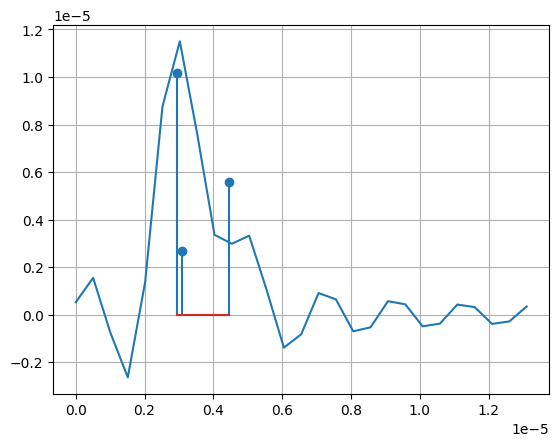

In [149]:
n = np.random.randint(400)
m = np.random.randint(25)
len_sq =  len(t)
# plt.plot(cirs_obs[n, 27*6+0:27])
plt.plot(t, cirs_pure[n, len_sq*m:len_sq*m+len_sq])
# plt.plot(t, cirs_obs[n, len_sq*m:len_sq*m+len_sq])
# plt.figure()
plt.stem(cir_profile_ld[n, m][0, :], cir_profile_ld[n, m][1, :])
plt.grid()

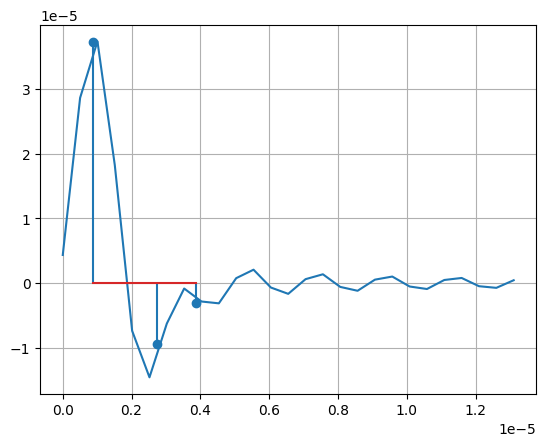

In [11]:
n = np.random.randint(400)
m = np.random.randint(25)
len_sq =  len(t)
# plt.plot(cirs_obs[n, 27*6+0:27])
plt.plot(t, cirs_pure[n, len_sq*m:len_sq*m+len_sq])
# plt.plot(t, cirs_obs[n, len_sq*m:len_sq*m+len_sq])
# plt.figure()
plt.stem(cir_profile_ld[n, m][0, :], cir_profile_ld[n, m][1, :])
plt.grid()

<StemContainer object of 3 artists>

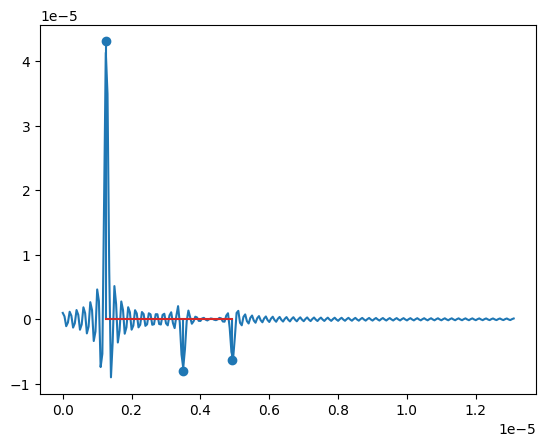

In [134]:
n = np.random.randint(400)
m = np.random.randint(25)
len_sq = len(t)
# plt.plot(cirs_obs[n, 27*6+0:27])
plt.plot(t, cirs_pure[n, len_sq*m:len_sq*m+len_sq])
# plt.plot(t, cirs_obs[n, len_sq*m:len_sq*m+len_sq])
# plt.figure()
plt.stem(cir_profile_ld[n, m][0, :], cir_profile_ld[n, m][1, :])

In [135]:
def extract_features(cirs, t):
        '''
        Extracting manual defined features:
            mean excess delay tau_m
            max excess delay tau_max
            rms delay spread tau_rms
            total received power P
            number of multipath components N
            power of first path P_1
            arrival time of first path tau_1
        from filtered continuous signal
        '''
        features = []
        T, S = cirs.shape
        seq_len = len(t)
    

        for j in range(T):
            feature = None
            cir_obs_tmp = np.abs(cirs[:, i:i+seq_len])

            tau_max = np.argmax(cir_obs_tmp, axis=0)
            P = np.linalg.norm(c_tmp)
            for i in range(0, S, seq_len):
                
                tmp = np.fft.fft(cirs_obs[:, i:i+seq_len])
                cir_obs_tmp = cirs[:, i:i+seq_len]
                if cfr is not None:
                    cfr = np.concatenate([cfr, tmp], axis=1)
                else:
                    cfr = tmp
            cir_t = [] # channel impulse response for a transmitter
            for i in range(S):
                c_tmp = cirs[j, i]
                
                m, n = c_tmp.shape
                if m < 2:
                    tau_m, tau_max, tau_rms, P, N, P_1, tau_1 = 0, 0, 0, 0, 0, 0, 0
                else:
                    tau_m = np.real(c_tmp[0]).mean()
                    tau_max = np.real(c_tmp)[0, -1]
                    P = np.linalg.norm(c_tmp[1])
                    P_1 = np.linalg.norm(c_tmp[1, 0])
                    tau_1 = np.real(c_tmp[0, 0])
                    N = n

                features.append(np.array([tau_m, tau_max, tau_1, P, P_1, N]))

        return np.reshape(np.array(features), (T, -1))

In [14]:
c_tmp = np.abs(cirs_obs[:, 0:27])
tau_1 = np.argmax(c_tmp, axis=1)
c_amp = [c_tmp[i, t] for i, t in enumerate(tau_1)]
reflection_nums = []
tau_max = []
for c_t, c_a in zip(c_tmp, c_amp):
    imps = c_t > c_a * .5
    refs = np.sum(imps)
    reflection_nums.append(refs)
    tau_max.append(c_t[imps][-1])

IndexError: index -1 is out of bounds for axis 0 with size 0

<StemContainer object of 3 artists>

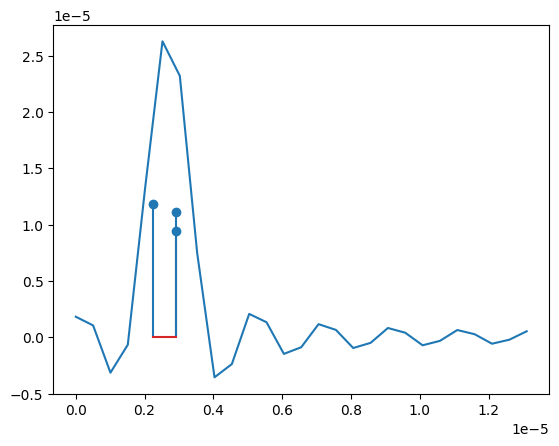

In [15]:
n = np.random.randint(400)
m = np.random.randint(25)

# plt.plot(cirs_obs[n, 27*6+0:27])
plt.plot(t, cirs_pure[n, len_sq*m:len_sq*m+len_sq])
# plt.figure()
plt.stem(cir_profile_ld[n, m][0, :], cir_profile_ld[n, m][1, :])

In [ ]:
def noise_paires():
    ...

In [136]:
seq_len = len(t)
cfr = None
for i in range(0, cirs_obs.shape[1], seq_len):
    tmp = np.fft.fft(cirs_obs[:, i:i+seq_len])
    if cfr is not None:
        cfr = np.concatenate([cfr, tmp], axis=1)
    else:
        cfr = tmp

In [137]:
cirs_norm = np.linalg.norm(cirs_pure, axis=1).reshape(n_tx, -1)
cfrs_norm = np.linalg.norm(cfr, axis=1).reshape(n_tx, -1)

## Learning with ensemble methods

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.pipeline import Pipeline
import lightgbm as lgb

In [139]:
def test_pipe(x_train, x_test, y_train, y_test, ax=plt, coord='geo', 
              label=None, 
              n_estimators=600,
              max_depth=50):
    '''function training model and outputs cdf plot'''
    lgb_pipe = Pipeline([('lgb', MultiOutputRegressor(lgb.LGBMRegressor(subsample=1,
                                                                        colsample_bytree=1, 
                                                                        reg_lambda=0,
                                                                        n_estimators=n_estimators,
                                                                        max_depth=max_depth)))])
    lgb_pipe.fit(x_train, y_train)
    y_pred = lgb_pipe.predict(x_test)   

    if coord == 'geo':
        dist_error = dist_from_geo(y_pred, y_test)
    else:
        dist_error = dist_from_cat(y_pred, y_test)
    
    cdf_plot(dist_error, ax=ax, label=label)

    return lgb_pipe, dist_error

In [140]:
pure_train, pure_test,\
      feature_train, feature_test,\
          norm_train, norm_test,\
              obs_train, obs_test,\
                  fnorm_train, fnorm_test,\
                      tx_train, tx_test,\
                         rssi_train, rssi_test = train_test_split(cirs_pure, 
                                                            cirs_feature, 
                                                            cirs_norm, 
                                                            cirs_obs,
                                                            cfrs_norm,
                                                            TX_ld,
                                                            rssi_ld)

In [141]:
new_stack = np.hstack((cirs_feature, TX_ld))
cov = np.cov(new_stack.T)

<Axes: >

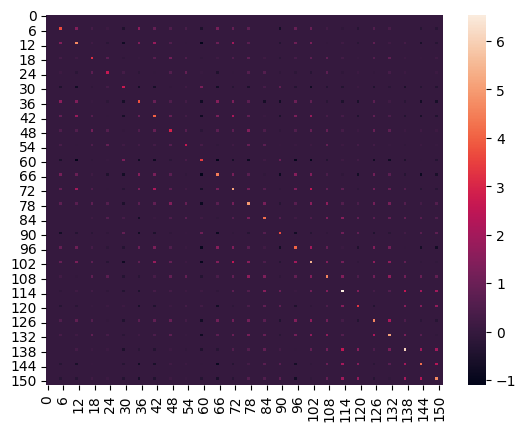

In [45]:
sns.heatmap(cov)

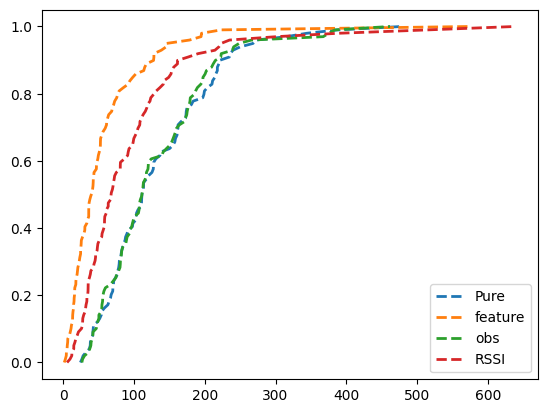

In [23]:
# plots with 400 tx

dist_pure = test_pipe(pure_train, pure_test, tx_train, tx_test, label='Pure', n_estimators=400,
              max_depth=180)
dist_feature = test_pipe(feature_train, feature_test, tx_train, tx_test, label='feature', n_estimators=400,
              max_depth=180)
# dist_norm = test_pipe(norm_train, norm_test, tx_train, tx_test, label='norm')
dist_obs = test_pipe(obs_train, obs_test, tx_train, tx_test, label='obs', n_estimators=400,
              max_depth=180)
# dist_fnorm = test_pipe(fnorm_train, fnorm_test, tx_train, tx_test)
dist_rssi = test_pipe(rssi_train, rssi_test, tx_train, tx_test, label='RSSI', n_estimators=400,
              max_depth=180)

plt.legend()

In [146]:
14378/53

271.2830188679245

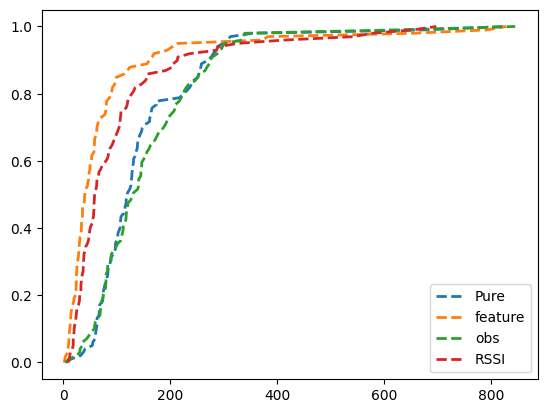

In [145]:
# plots with 400 tx
n_e = 400
n_depth = 500
dist_pure = test_pipe(pure_train, pure_test, tx_train, tx_test, label='Pure', n_estimators=n_e,
              max_depth=n_depth)
dist_feature = test_pipe(feature_train, feature_test, tx_train, tx_test, label='feature', n_estimators=n_e,
              max_depth=n_depth)
# dist_norm = test_pipe(norm_train, norm_test, tx_train, tx_test, label='norm')
dist_obs = test_pipe(obs_train, obs_test, tx_train, tx_test, label='obs', n_estimators=n_e,
              max_depth=n_depth)
# dist_fnorm = test_pipe(fnorm_train, fnorm_test, tx_train, tx_test)
dist_rssi = test_pipe(rssi_train, rssi_test, tx_train, tx_test, label='RSSI', n_estimators=n_e,
              max_depth=20)

plt.legend()

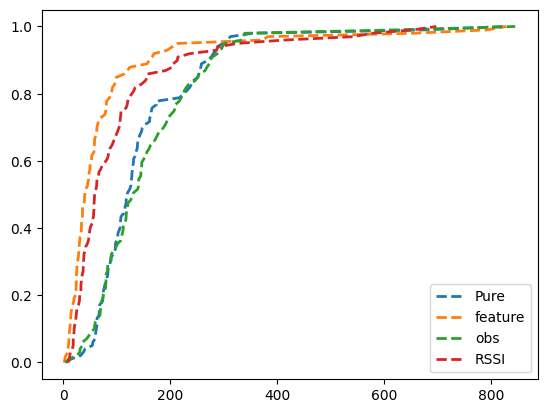

In [144]:
# plots with 400 tx
n_e = 400
n_depth = 1000
dist_pure = test_pipe(pure_train, pure_test, tx_train, tx_test, label='Pure', n_estimators=n_e,
              max_depth=n_depth)
dist_feature = test_pipe(feature_train, feature_test, tx_train, tx_test, label='feature', n_estimators=n_e,
              max_depth=n_depth)
# dist_norm = test_pipe(norm_train, norm_test, tx_train, tx_test, label='norm')
dist_obs = test_pipe(obs_train, obs_test, tx_train, tx_test, label='obs', n_estimators=n_e,
              max_depth=n_depth)
# dist_fnorm = test_pipe(fnorm_train, fnorm_test, tx_train, tx_test)
dist_rssi = test_pipe(rssi_train, rssi_test, tx_train, tx_test, label='RSSI', n_estimators=n_e,
              max_depth=20)

plt.legend()

# Learning with kNN

In [24]:
from sklearn.neighbors import NearestNeighbors, KDTree

In [25]:
k = 5

nn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(feature_train)

In [26]:
ks = [2, 5, 10, 15]
dists_nn = []
dists_nn_mean = []

for k in ks:
    nn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(feature_train)
    dist, incs = nn.kneighbors(feature_test)
    nn_preds = np.mean(np.squeeze(tx_train[incs]), axis=1)
    nn_median = np.median(np.squeeze(tx_train[incs]), axis=1)

    dist_tmp = dist_from_geo(tx_test, nn_preds)
    dist_median = dist_from_geo(tx_test, nn_median)
    dists_nn_mean.append(dist_tmp)
    dists_nn.append(dist_median)

In [24]:
dist, incs = nn.kneighbors(feature_test)
nn_preds = np.mean(np.squeeze(tx_train[incs]), axis=1)
dist_feature_nn = dist_from_geo(tx_test, nn_preds)

## Summarize

In [28]:
import pandas as pd

In [29]:
dists = [dist_pure[1], dist_feature[1], dist_obs[1], dist_rssi[1]]

In [30]:
result = pd.DataFrame()
result['mean'] = np.mean(dists, axis=1)
result['median'] = np.median(dists, axis=1)
result['min'] = np.min(dists, axis=1)
result['max'] = np.max(dists, axis=1)
result['var'] = np.var(dists, axis=1)
result['loss'] = [np.sum(i**2)/len(i) for i in dists]

col = {}
col_name = ['CIR', 'CIR feature', 'CIR noisy', 'RSSI', 'kNN']
for i in range(len(col_name)):
    col[i] = col_name[i]

result.rename(index=col)

,mean,median,min,max,var,loss
CIR,131.779962,111.206115,24.140527,478.551147,6654.094450,24020.052836
CIR feature,57.106329,39.651534,1.337631,577.504210,4853.495366,8114.628148
CIR noisy,129.171658,111.116656,26.200928,461.837359,6561.447598,23246.764869
RSSI,93.931473,67.571425,5.272893,638.759981,8957.325606,17780.447181


In [42]:
col = {}
col_name = ['CIR', 'CIR feature', 'CIR noisy', 'RSSI', 'kNN']
for i in range(len(col_name)):
    col[i] = col_name[i]

result.rename(index=col)

,mean,median,min,max,var,loss
CIR,131.779962,111.206115,24.140527,478.551147,6654.094450,24020.052836
CIR feature,57.106329,39.651534,1.337631,577.504210,4853.495366,8114.628148
CIR noisy,129.171658,111.116656,26.200928,461.837359,6561.447598,23246.764869
RSSI,93.931473,67.571425,5.272893,638.759981,8957.325606,17780.447181


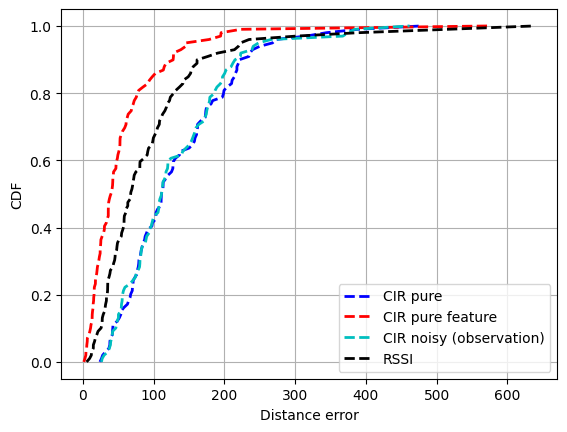

In [43]:
cdf_plot(dist_pure[1], label='CIR pure', c='b')
cdf_plot(dist_feature[1], label='CIR pure feature', c='r')
# cdf_plot(dist_norm[1], label='norm')
cdf_plot(dist_obs[1], label='CIR noisy (observation)', c='c')
# cdf_plot(dist_fnorm[1], label='fnorm')
cdf_plot(dist_rssi[1], label='RSSI', c='k')
# cdf_plot(dist_feature_nn, label='nn')
plt.legend()
plt.grid()
plt.xlabel('Distance error')
plt.ylabel('CDF')
plt.savefig('./imgs/overall_compare_cir_rssi.pdf')

# kNN vs 1NN with fingerprint database

In [33]:
def one_nn_fingerprint(x_obs, x_db, TX, tree_type='ball_tree'):
    nn = NearestNeighbors(n_neighbors=1, algorithm=tree_type).fit(x_db)
    _, incs = nn.kneighbors(x_obs)
    tx_pred = TX[incs]
    return np.squeeze(tx_pred)

def knn_train(x_obs, x_obs_db, TX, k=5, tree_type='ball_tree'):
    nn = NearestNeighbors(n_neighbors=k, algorithm=tree_type).fit(x_obs_db)
    _, incs = nn.kneighbors(x_obs)
    
    tx_pred = np.median(np.squeeze(TX[incs]), axis=1)
    return tx_pred

In [111]:
cirs_obs_10, cirs_pure = sinc_filter(cir_profile_ld, t, W, snr=10)
cirs_obs_20, cirs_pure_1 = sinc_filter(cir_profile_ld, t, W, snr=20)
cirs_obs_n10, cirs_pure_2 = sinc_filter(cir_profile_ld, t, W, snr=50)

cirs_obs_10 = preprocess_cir(cirs_obs_10, num=n_tx)
cirs_obs_20 = preprocess_cir(cirs_obs_20, num=n_tx)
cirs_obs_n10 = preprocess_cir(cirs_obs_n10, num=n_tx)
cirs_pure = preprocess_cir(cirs_pure, num=n_tx)

In [112]:
obs10_train, obs10_test, obs20_train, obs20_test, n10_train, n10_test, tx_train, tx_test = train_test_split(cirs_obs_10, cirs_obs_20, cirs_obs_n10, TX_ld)

In [113]:
# tx_prd = one_nn_fingerprint(obs_test, cirs_pure, TX_ld)
tx_knn_10 = knn_train(obs10_test, obs10_train, tx_train)
tx_knn_20 = knn_train(obs20_test, obs20_train, tx_train)
tx_knn_n10 = knn_train(n10_test, n10_train, tx_train)


tx_1nn_10 = one_nn_fingerprint(obs10_test, cirs_pure, TX_ld)
tx_1nn_20 = one_nn_fingerprint(obs20_test, cirs_pure, TX_ld)
tx_1nn_n10 = one_nn_fingerprint(n10_test, cirs_pure, TX_ld)


In [114]:
e_knn_10 = dist_from_geo(tx_knn_10, tx_test)
e_knn_20 = dist_from_geo(tx_knn_20, tx_test)
e_knn_n10 = dist_from_geo(tx_knn_n10, tx_test)

e_1nn_10 = dist_from_geo(tx_1nn_10, tx_test)
e_1nn_20 = dist_from_geo(tx_1nn_20, tx_test)
e_1nn_n10 = dist_from_geo(tx_1nn_n10, tx_test)


In [115]:
e = [e_knn_10, e_knn_20, e_knn_n10, e_1nn_10, e_1nn_20, e_1nn_n10]

In [116]:
def df_format(dists, col_name=None):
    result = pd.DataFrame()
    result['mean'] = np.mean(dists, axis=1)
    result['median'] = np.median(dists, axis=1)
    result['min'] = np.min(dists, axis=1)
    result['max'] = np.max(dists, axis=1)
    result['var'] = np.var(dists, axis=1)
    result['loss'] = [np.sum(i**2)/len(i) for i in dists]

    col = {}

    if isinstance(col_name, list):
        col_name = col_name #['CIR', 'CIR feature', 'CIR norm', 'CIR noisy', 'CFR norm', 'RSSI', 'kNN']
        for i in range(len(col_name)):
            col[i] = col_name[i]

        result.rename(index=col)
    return result

In [117]:
l = ['knn 10 db', 'knn 20 db', 'knn 50 db', '1nn 10 db', '1nn 20 db', '1nn 50 db']
isinstance(l, list)

True

In [118]:
df_format(e, col_name=['knn 10 db', 'knn 20 db', 'knn 50 db', '1nn 10 db', '1nn 20 db', '1nn 50 db'])

,mean,median,min,max,var,loss
0,337.258159,268.360509,0.0,1059.168186,59955.457964,173698.523858
1,232.563134,148.854202,0.0,848.657392,47068.992459,101154.603544
2,219.216133,117.684882,0.0,832.171745,46119.056157,94174.769200
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [119]:
def loss(dist_arr):
    return np.sum(dist_arr ** 2) / len(dist_arr)

In [120]:
d = dist_from_geo(tx_1nn_n10, tx_test)
loss(d), np.mean(d)

(0.0, 0.0)

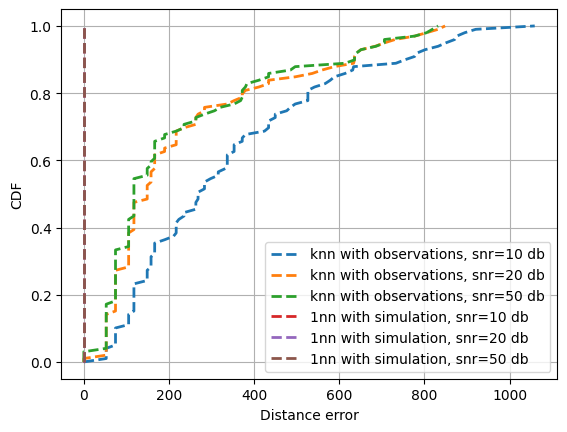

In [122]:
cdf_plot(dist_from_geo(tx_knn_10, tx_test), label='knn with observations, snr=10 db')
cdf_plot(dist_from_geo(tx_knn_20, tx_test), label='knn with observations, snr=20 db')
cdf_plot(dist_from_geo(tx_knn_n10, tx_test), label='knn with observations, snr=50 db')

cdf_plot(dist_from_geo(tx_1nn_10, tx_test), label='1nn with simulation, snr=10 db')
cdf_plot(dist_from_geo(tx_1nn_20, tx_test), label='1nn with simulation, snr=20 db')
cdf_plot(dist_from_geo(tx_1nn_n10, tx_test), label='1nn with simulation, snr=50 db')
plt.legend()
plt.grid()
plt.xlabel('Distance error')
plt.ylabel('CDF')
plt.savefig('./imgs/knn_compare.pdf')